In [1]:
import pandas as pd
import yfinance as yahoo
import numpy as np

In [2]:
data = yahoo.download(tickers="BMA BMA.BA CEPU CEPU.BA  CRESY CRES.BA "
                              "EDN EDN.BA GGAL GGAL.BA IRS IRSA.BA LOMA LOMA.BA PAM"
                              " PAMP.BA SUPV SUPV.BA TEO TECO2.BA TGS TGSU2.BA YPF YPFD.BA ARS=X", period="2y", interval="60m")['Adj Close']

data = data.rename(columns={'BMA.BA':'BMABA', 'CEPU.BA':'CEPUBA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

data = data.fillna(method='ffill')

[*********************100%***********************]  25 of 25 completed


In [3]:
cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)
cable['USDARS'] = data.USDARS

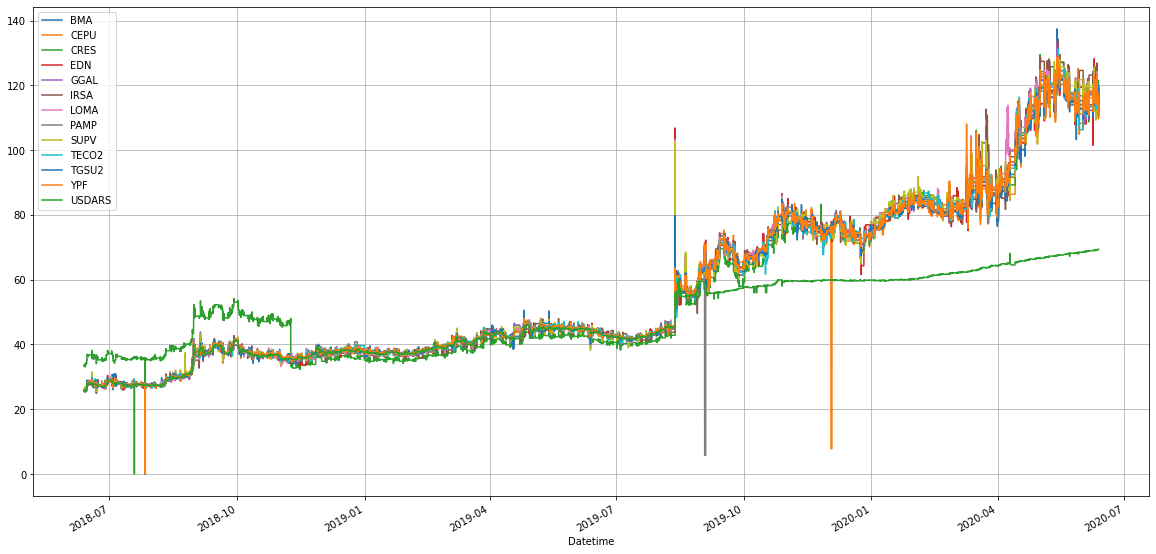

In [4]:
c = cable.plot(figsize=(20,10))
c.grid()

In [5]:
merval = pd.DataFrame(None) 
merval['BMABA'] = data.BMABA
merval['CEPUBA'] = data.CEPUBA
merval['CRESBA'] = data.CRESBA
merval['EDNBA'] = data.EDNBA
merval['GGALBA'] = data.GGALBA
merval['IRSABA'] = data.IRSABA
merval['LOMABA'] = data.LOMABA
merval['SUPVBA'] = data.SUPVBA
merval['TECO2BA'] = data.TECO2BA
merval['TGSU2BA'] = data.TGSU2BA
merval['YPFDBA'] = data.YPFDBA

In [6]:
mervaladj = pd.DataFrame(None)
mervaladj['BMABA'] = merval.BMABA / cable.BMA
mervaladj['CEPUBA'] = merval.CEPUBA / cable.CEPU
mervaladj['CRESBA'] = merval.CRESBA / cable.CRES
mervaladj['EDNBA'] = merval.EDNBA / cable.EDN
mervaladj['GGALBA'] = merval.GGALBA / cable.GGAL
mervaladj['IRSABA'] = merval.IRSABA / cable.IRSA
mervaladj['LOMABA'] = merval.LOMABA / cable.LOMA
mervaladj['SUPVBA'] = merval.SUPVBA / cable.SUPV
mervaladj['TECO2BA'] = merval.TECO2BA / cable.TECO2
mervaladj['TGSU2BA'] = merval.TGSU2BA / cable.TGSU2
mervaladj['YPFDBA'] = merval.YPFDBA / cable.YPF

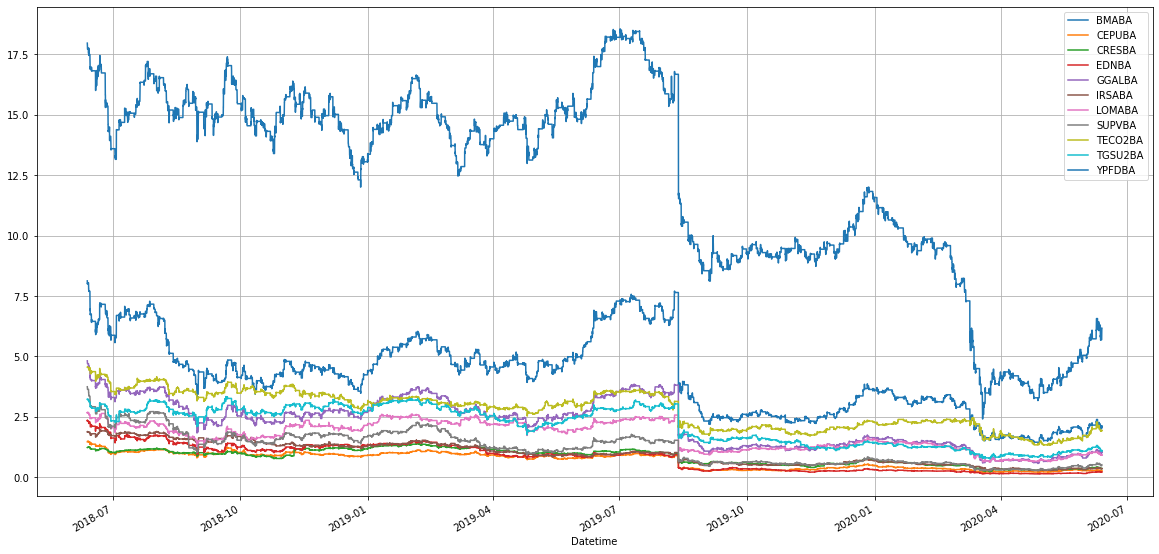

In [7]:
mervalinusd = mervaladj.plot(figsize=(20,10))
mervalinusd.grid()

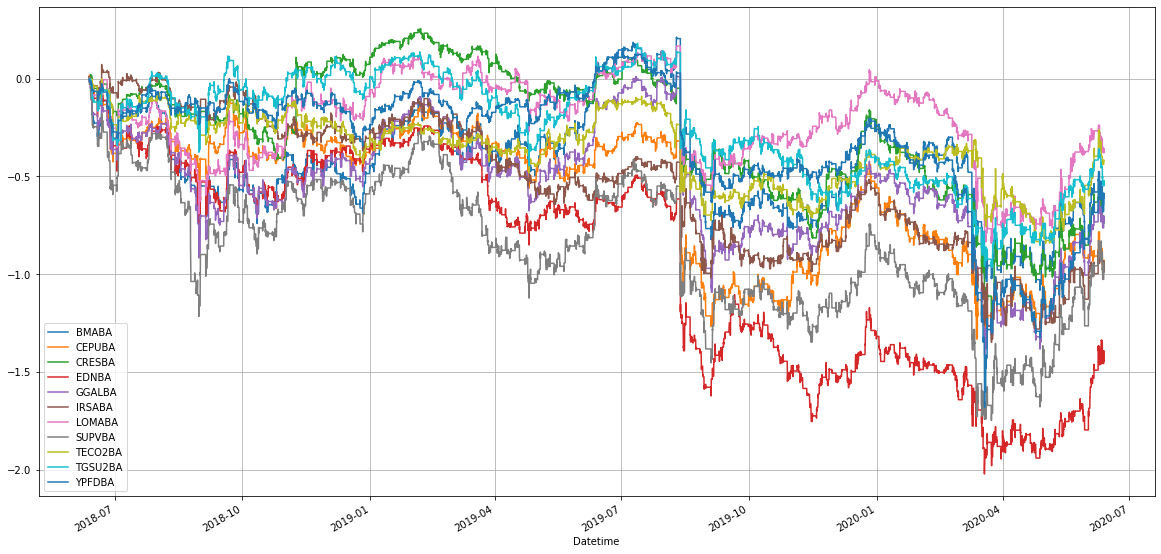

In [8]:
mervalusd = mervaladj.pct_change().cumsum().plot(figsize=(20,10))
mervalusd.grid()

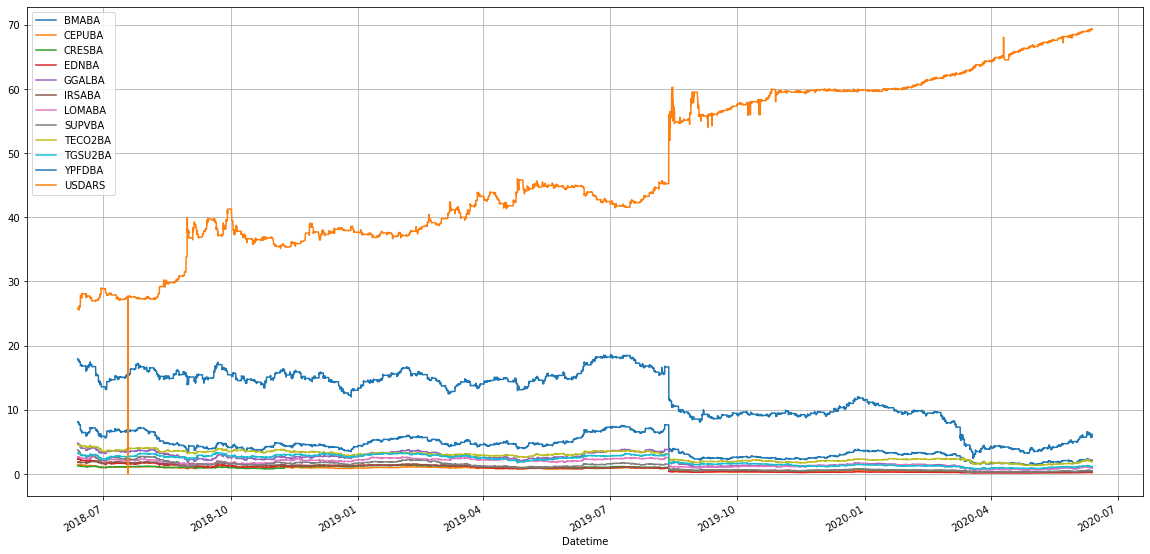

In [9]:
mervalwithusd = pd.DataFrame(mervaladj)
mervalwithusd['USDARS'] = data.USDARS
merusd = mervalwithusd.plot(figsize=(20,10))
merusd.grid()